<a href="https://colab.research.google.com/github/vposwalia/Alternate-Kicks/blob/master/SpotifyVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

In [3]:
data = pd.read_csv("/data.csv")
genre_data = pd.read_csv('/data_by_genres.csv')
year_data = pd.read_csv('/data_by_year.csv')

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66326 entries, 0 to 66325
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           66326 non-null  float64
 1   year              66326 non-null  int64  
 2   acousticness      66326 non-null  float64
 3   artists           66326 non-null  object 
 4   danceability      66326 non-null  float64
 5   duration_ms       66326 non-null  int64  
 6   energy            66326 non-null  float64
 7   explicit          66326 non-null  int64  
 8   id                66326 non-null  object 
 9   instrumentalness  66326 non-null  float64
 10  key               66326 non-null  int64  
 11  liveness          66326 non-null  float64
 12  loudness          66326 non-null  float64
 13  mode              66326 non-null  int64  
 14  name              66326 non-null  object 
 15  popularity        66326 non-null  int64  
 16  release_date      66326 non-null  object

In [5]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [6]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


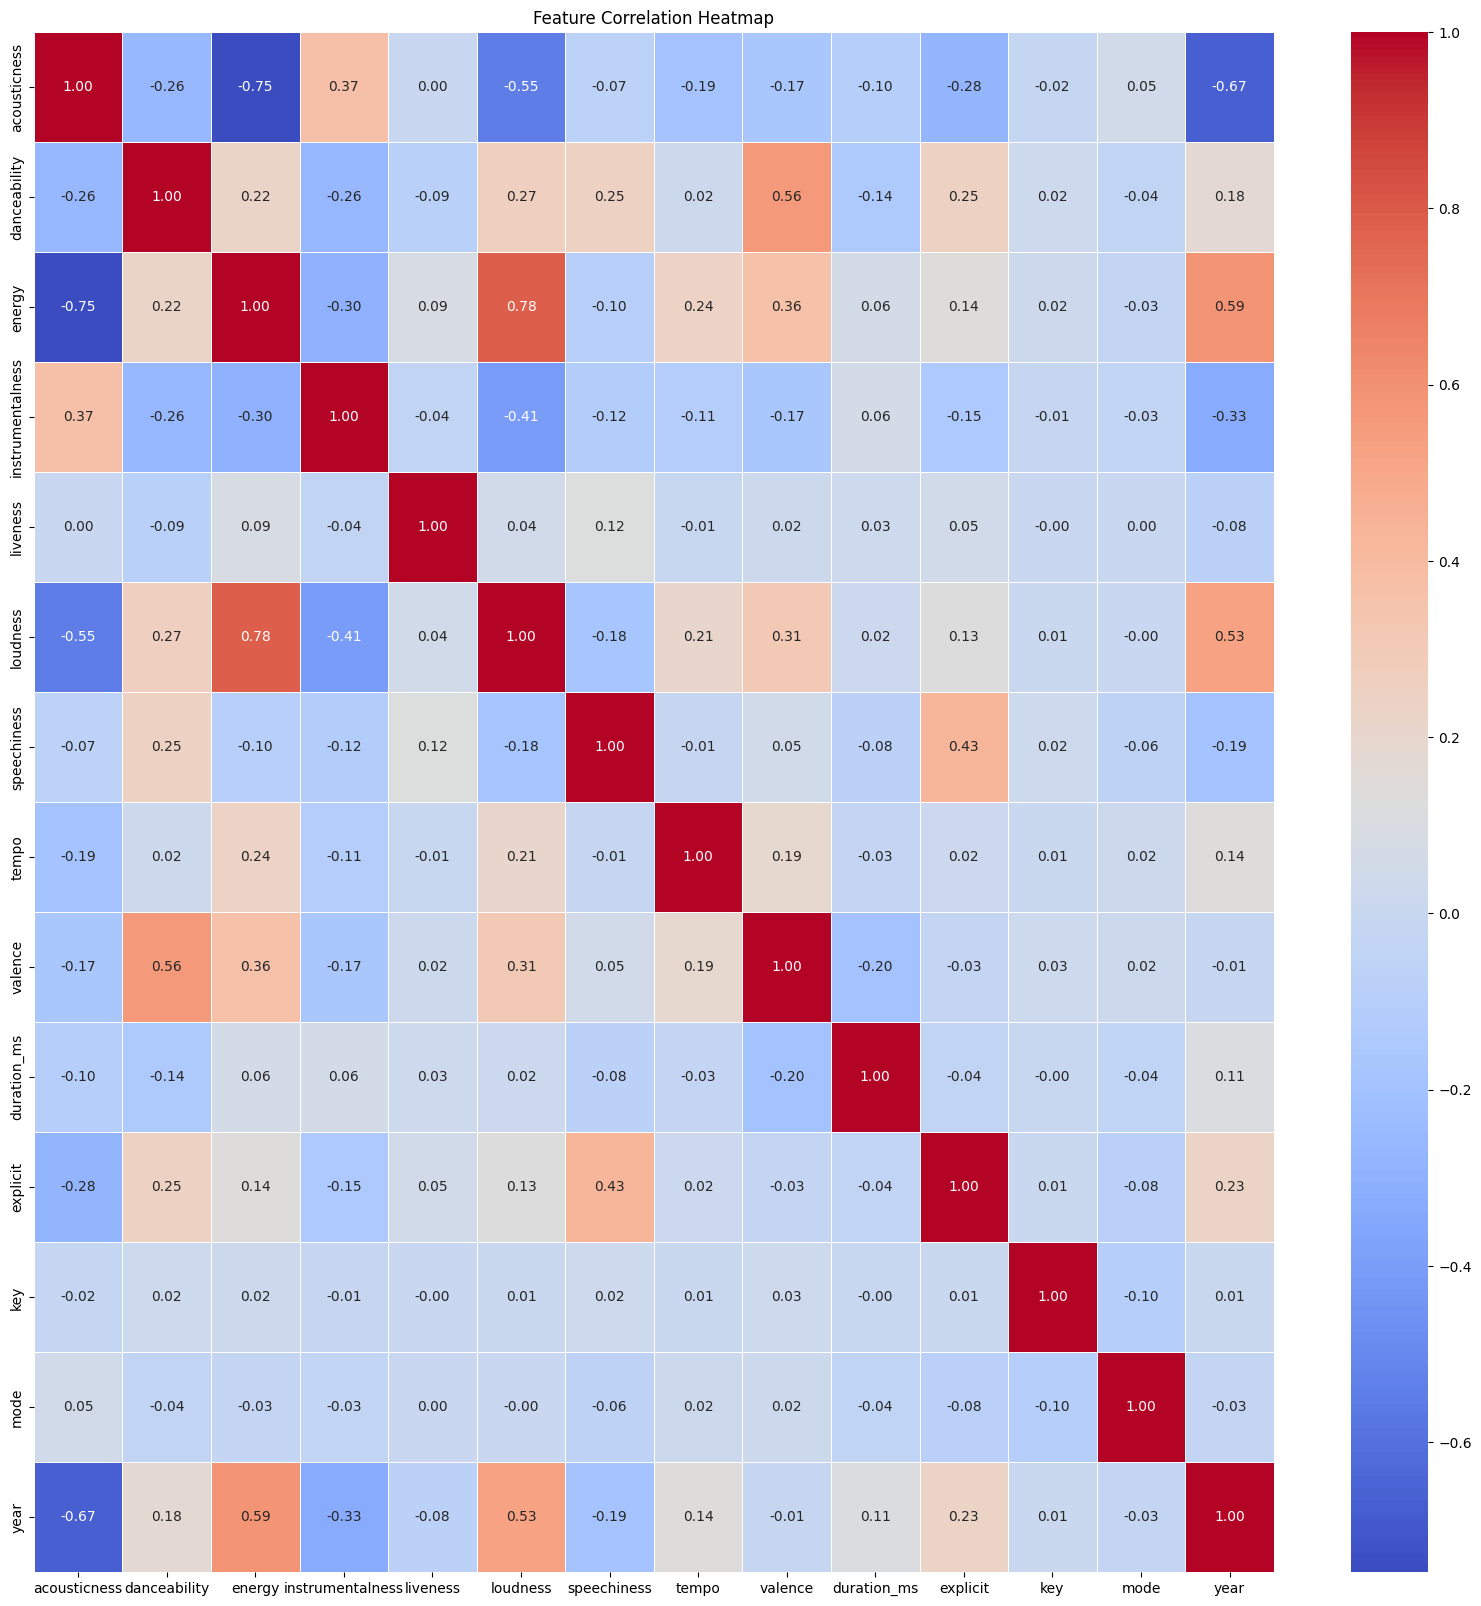

In [8]:
#we are using heatmap to visualize correlations.
#using seaborn and matplot
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                 'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
                 'duration_ms', 'explicit', 'key', 'mode', 'year']

X, y = data[feature_names], data['popularity']

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [9]:
#Understanding by visualization
#we are creating a new decade column and then visualizing the count of songs per decade using Seaborn countplot

<ipython-input-14-036469d72d59>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['decade'], palette='viridis')


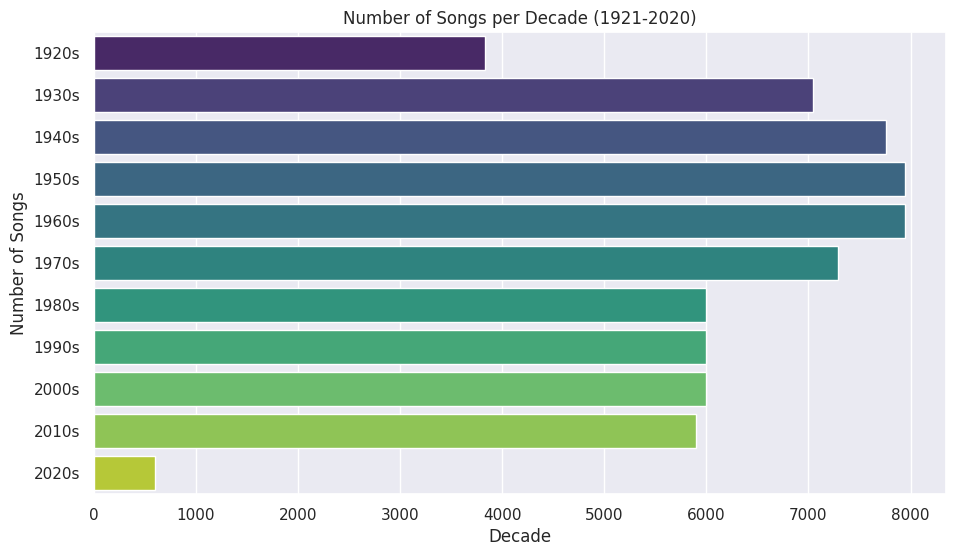

In [14]:
# Function to get the decade from the year
def get_decade(year):
    return f"{int(year/10) * 10}s"

# Apply the function to create a new 'decade' column
data['decade'] = data['year'].apply(get_decade)

# Set the figure size
plt.figure(figsize=(11, 6))

# Plot the count of songs per decade
sns.countplot(data['decade'], palette='viridis')

plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.title('Number of Songs per Decade (1921-2020)')
plt.show()


In [17]:

sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

fig = px.line(year_data, x='year', y=sound_features,
              labels={'value': 'Sound Feature Value', 'year': 'Year'},
              title='Trends of Sound Features Over the Years',
              color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    legend_title_text='Sound Features',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    xaxis=dict(tickmode='linear', tick0=1920, dtick=10),
    yaxis=dict(title_text='Sound Feature Value'),
)

# Show the plot
fig.show()


In [21]:
import plotly.express as px

top10_genres = genre_data.nlargest(10, 'popularity')
#grouped bar chart
fig = px.bar(top10_genres,
             x='genres',
             y=['valence', 'energy', 'danceability', 'acousticness'],
             barmode='group',
             labels={'value': 'Characteristic Value', 'genres': 'Genres'},
             title='Top 10 Genres - Characteristics Comparison',
             color_discrete_sequence=px.colors.qualitative.Dark24)  # Change the color sequence here

fig.update_layout(
    legend_title_text='Characteristics',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    xaxis=dict(title='Genres'),
    yaxis=dict(title='Characteristic Value'),
)

fig.show()


In [25]:
#clustering genres with k means

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import pandas as pd
import plotly.express as px
import numpy as np

X = genre_data.select_dtypes(np.number)

# Creating pipeline
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
genre_data['cluster'] = cluster_pipeline.fit_predict(X)

#for t-SNE visualization
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)

#DataFrame for the t-SNE projection
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres', 'cluster'],
    title='K-Means Clustering of Genres with t-SNE Visualization')
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.008s...
[t-SNE] Computed neighbors for 2973 samples in 0.384s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.814297
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.617905
[t-SNE] KL divergence after 1000 iterations: 1.168741
